<a href="https://colab.research.google.com/github/vegger/MLDM/blob/main/preclass/MLDM_HS22_L05_Supervised_Learning_PRE_CLASS_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L05 - Supervised Learning


NOTE: 
- To execute all code and see the results in COLAB, click on menu "Runtime" -> "Execute all"  or press CTRL-F9
- To execute a single cell, press CTRL-Return (or SHIFT-Return to jump to next cell afterwards)



### Machine Learning Lifecycle

A very simplified Machine Learning project consists of the following steps:
- Raw data aggregation
- Data Preprocessing
- Feature extraction
- Training a machine learning algorithm
- Performance evaluation
- Algorithm optimization

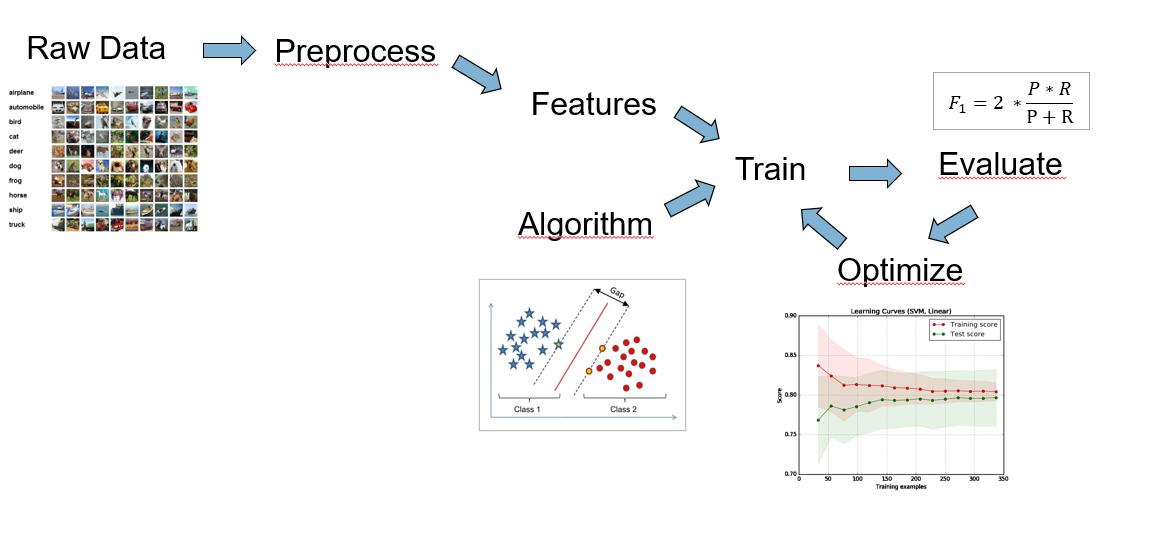

In this lecture we will discuss the details of the "Train - Evaluate - Optimize" loop that will ouput - hopefully - a good machine learning model for the given task and dataset. 


# Splitting the Data into Training and Test Set

When we build a machine learning model, we usually want to use as much data for the training as possible. As a rule of thumb, one can say "the more data the better". On the other hand, once the training is finished we want to know how good the model will perform on new data samples that were not in the training data. For this reason, we usually split the given data into two disjoint sets: a **Training Set** and a **Test Set**. A typical split of the data is 80% training data and 20% test data, but other splits (e.g. 95:5 or 60:40) are also possible, depending on the amount of available data.





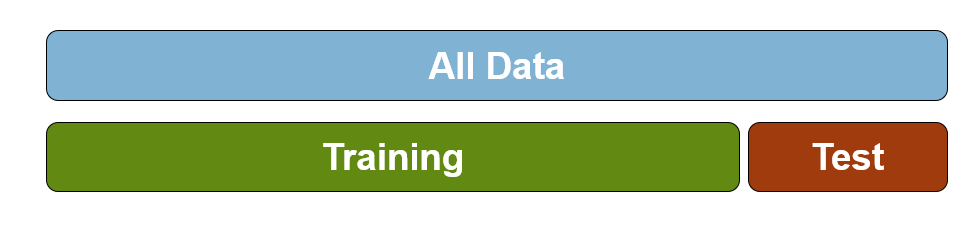

 
TODO: add code for train-test split


In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_blobs(n_samples=1000, random_state=0)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"Dataset shape before splitting: X: {X.shape}; y: {y.shape}")
print(f"Dataset shape after splitting: X: train: {X_train.shape}, test: {X_test.shape}; y: train: {y_train.shape}, test: {y_test.shape}")

Dataset shape before splitting: X: (1000, 2); y: (1000,)
Dataset shape after splitting: X: train: (800, 2), test: (200, 2); y: train: (800,), test: (200,)


# Evaluation Measures for Classification Tasks
Once we have trained a machine learning model, we need to evaluate its quality. For classification tasks, the typical quality measures are **Accuracy, Precision, Recall** and **F1 Score**, which are based on the **Confusion Matrix** of the test data. These scores are described in detail in the following tutorial. 

# TASK: Read the following tutorial: https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd




Which score best reflects the quality of the model depends on our target task and dataset. The following code trains a Logistic Regression model on some artificial data, and outputs the corresponding scores. Note that the accuracy is very high, whereas the F1 score is rather low.

TODO: add code with corresponidng unbalanced data



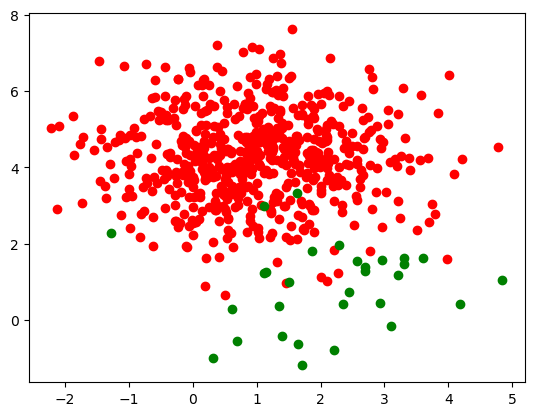

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=[600,30], centers=None, random_state=0, cluster_std=1.2, n_features=2)
class_1 = np.where(y == 0)[0]
class_2 = np.where(y == 1)[0]
plt.scatter(X[class_1,0],X[class_1,1],color=['red'])
plt.scatter(X[class_2,0],X[class_2,1],color=['green'])
plt.show()

In [3]:
from collections import Counter

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# first, split the dataset in train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Initiate and train a logistic regression model
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_test_predicted = clf.predict(X_test)

# Calculate the Accuracy and the F1 Score
accuracy_test = clf.score(X_test, y_test)
f1_score_test = f1_score(y_test_predicted, y_test)

print(f"Accuracy: {accuracy_test}")
print(f"F1-Score: {f1_score_test}")

Accuracy: 0.9444444444444444
F1-Score: 0.3636363636363636


As you can see, high accuracy does not really reflect the quality of the classifier for unbalanced data. 

# Stratified Sampling


**Stratified Sampling** can be used for unbalanced data, i.e. data where some classes are much smaller than others. In this case, if we would use a classical random split into training and test data (e.g. 80:20) it might happen that some small classes are extremely rare or do not occur at all in the test data - thus leading to skewed results. 

To avoid this, stratified sampling divides the original data into its classes (called "strata") and then samples from these strata independently. This sampling can be done proportionate (i.e. distribution in the sampled data is proportional to the original distribution), or one can sample the same number of samples from each strata. 

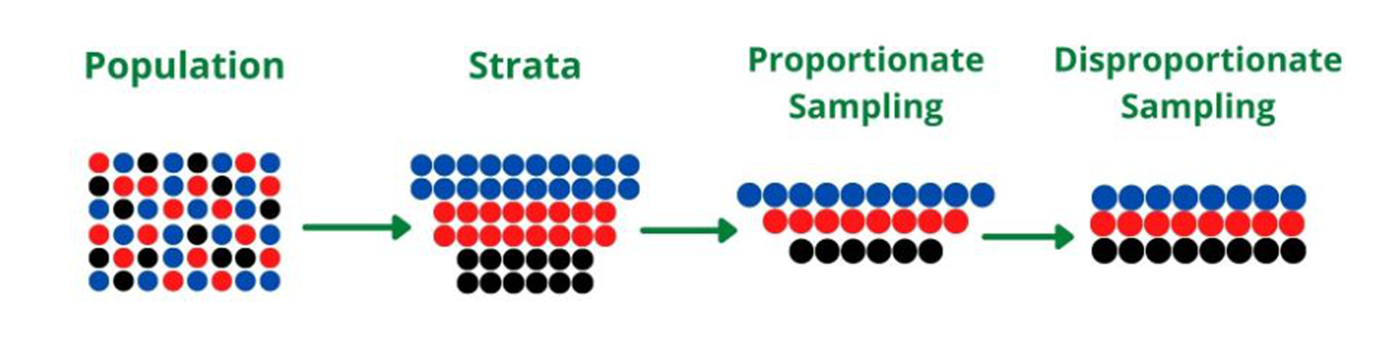
(Source: https://media.geeksforgeeks.org/wp-content/uploads/20210905231338/Stratified.JPG) 

In [5]:
# first, split the dataset in train and test datasets
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Initiate and train a logistic regression model
clf = LogisticRegression(random_state=0).fit(X_train_stratified, y_train_stratified)
y_test_predicted_stratified = clf.predict(X_test_stratified)

# Calculate the Accuracy and the F1 Score
accuracy_test = clf.score(X_test_stratified, y_test_stratified)
f1_score_test = f1_score(y_test_predicted_stratified, y_test_stratified)

print(f"Accuracy: {accuracy_test}")
print(f"F1-Score: {f1_score_test}")

Accuracy: 0.9761904761904762
F1-Score: 0.7692307692307692


What is the difference in the classic train test split and stratified?

Classic train test split:
Samples of each class in train: Counter({0: 483, 1: 21}) and test data: Counter({0: 117, 1: 9})
Stratified train test split:
Samples of each class in train: Counter({0: 480, 1: 24}) and test data: Counter({0: 120, 1: 6})


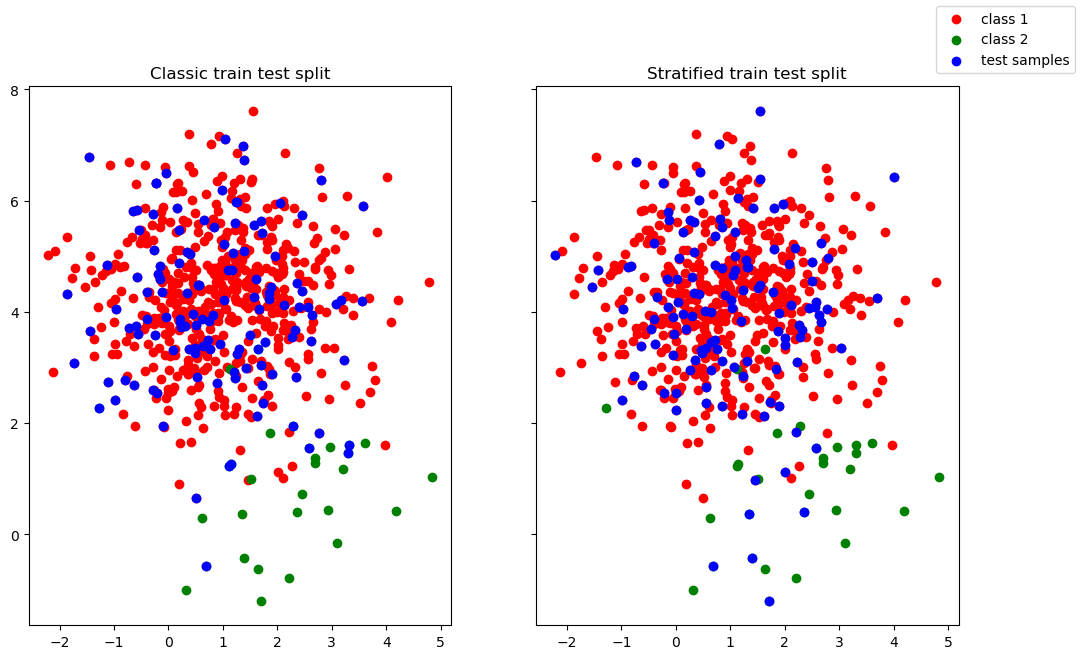

In [6]:
print("Classic train test split:")
print(f"Samples of each class in train: {Counter(y_train)} and test data: {Counter(y_test)}")

print("Stratified train test split:")
print(f"Samples of each class in train: {Counter(y_train_stratified)} and test data: {Counter(y_test_stratified)}")

# let us print the samples that were assigned to the test set on top of the original samples
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 7))

ax1.scatter(X[class_1,0],X[class_1,1],color=['red'], label="class 1")
ax1.scatter(X[class_2,0],X[class_2,1],color=['green'], label="class 2")
ax1.scatter(X_test[:, 0], X_test[:, 1], color="blue", label="test samples")
ax1.set_title("Classic train test split")

ax2.scatter(X[class_1,0],X[class_1,1],color=['red'])
ax2.scatter(X[class_2,0],X[class_2,1],color=['green'])
ax2.scatter(X_test_stratified[:, 0], X_test_stratified[:, 1], color="blue")
ax2.set_title("Stratified train test split")
fig.legend()
plt.show()

# Over- and Undersampling

Another way to deal with unbalanced data is over- and undersampling. The goal of both methods is to ensure that in the sampled data all classes are balanced or better represented.

## Oversampling
Oversampling  increases the number of samples in minority classes by creating new synthetic samples, e.g. by replicating (copying) and/or modifying existig samples. If samples are only replicated, there is a high risk of overfitting for the corresponding classes, since the new samples do not
expand the borders of the decision area and a trained model might fit them too well. Thus, if possible, data augmentation techniques are applied to obtain new (but similar) samples from the existing data samples. For instance, images could be translated, rotated, or scaled up and down, and audio could be modified using high- or low-pass filters. The goal of oversampling is always to create sufficient new synthetic samples such that all classes are of equal size.  

## Undersampling
Undersampling randomly selects only few samples from the larger classes, such that their number equals the number of samples from the smaller classes. This reduces the size of the dataset significanlty and usually causes information loss. In fact, in many cases, undersampling resulted in decreased  performance as compared to the original dataset. 

(Adapted from Wei Xia et al, 2019: 
High-Resolution Remote Sensing Imagery Classification of Imbalanced Data Using Multistage Sampling Method and Deep Neural Networks)

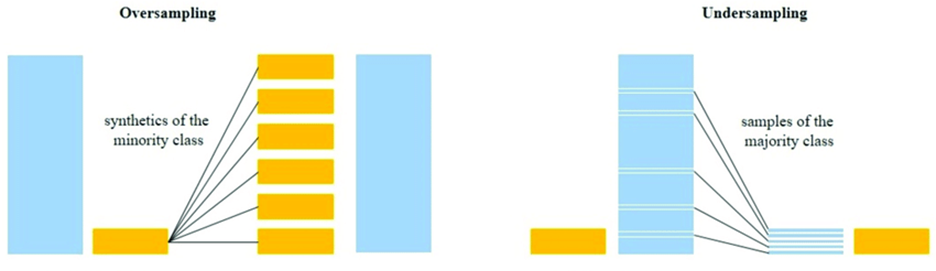

(source: https://www.researchgate.net/publication/336928271/figure/fig3/AS:820226086154241@1572568546659/Random-a-over-sampling-b-under-sampling.png)


## SMOTE
A more advanced sampling method is SMOTE (Synthetic Minority Oversampling Technique), which creates synthetic samples for the smaller classes by interpolating neighboring data points.
More precisely, the algorithm selects a random sample from a small class and then computes the k nearest neighbors of this sample (typically k = 5. Out of the k neighbors one is randomly selected, and a synthetic example is created at a random position between these two points. This way, the new synthetic datapoint will resemble a mix of features from the two selected data points. 

SMOTE combined with undersampling achieves better performance than solely using undersampling. 


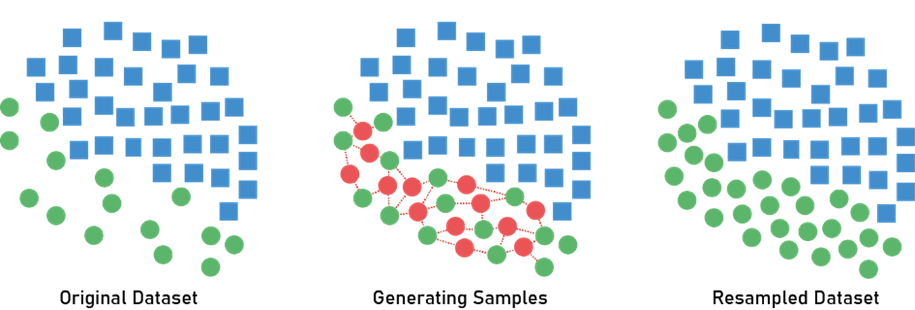

(source: https://emilia-orellana44.medium.com/smote-2acd5dd09948)

# Learning Curves

A **Learning Curve** visualizes how our algorithm performs on different amounts of training data. For this, we train the algorithm on different subsets of the training data (e.g. 10%, 20%, ... 100%), and evaluate its perfomance on the test data. Note that for the evaluation we use always *all* available test data.

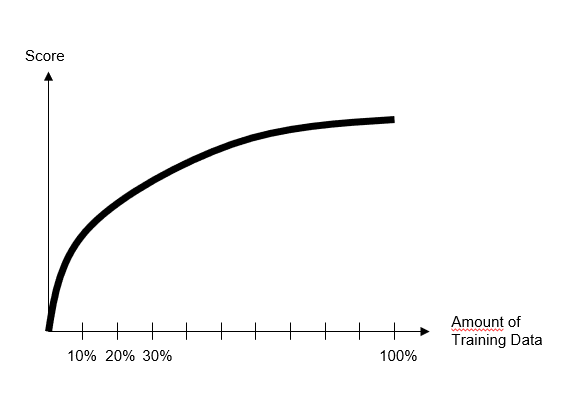


The image above shows a typical learning curve, which is steep at the beginning and rather flat towards the right. Note that here we want to maximize a score, e.g. F1 or Accuracy. If we are looking instead at the errors of our algorithm, then a learning curve might look like this: 


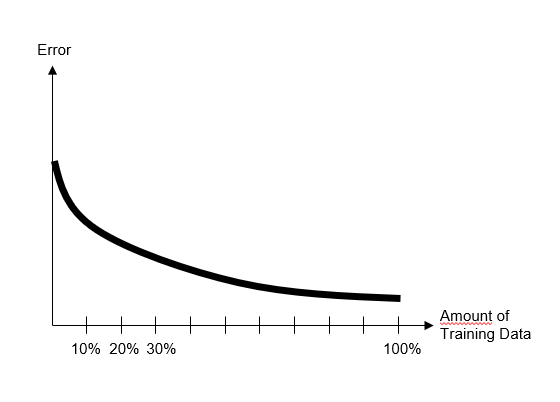

# Precision vs. Recall

We have seen in the previous section that there is a tradeoff between precision and recall: a higher precision usually implies a lower recall, and vice versa. Depending on our goals, our focus can be more on good precision, on good recall, or on a good ballance between the two.  

Logistic Regression (and also other classification algorithms) returns a score in ]0,1[ that indicates how likely it is for a sample to belong to one of the two output classes. For instance, a logistic regression model for spam detection that returns 0.9995 for a particular email message is predicting that it is very likely to be spam. On the other hand, another email message with a prediction score of 0.0003 is very likely not spam. In order to obtain a binary classifier - that only outputs "spam" or "not spam" - we have to set a **threshold** that decides which score indicates which class. For instance, with a threshold t = 0.6 each sample with an output score above or equal to 0.6 will be classified as spam, whereas each sample below 0.6 will be classified as not spam.

A **Precision-Recall Curve** is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds. For instance, in the example below, a threshold of t=0.9 yields a precision of 0.98 and a recall of 0.3. Thus, we can use this plot to determine the "best" value for the threshold t. 

Note that precision and recall don't need to have the same value: in some cases we might prefer a high recall, even if this means a lower precision, due to our application domain, or vice versa. For example, if the goal is cancer diagnosis, we might prefer higher recall because we don't want to miss a sick person.   



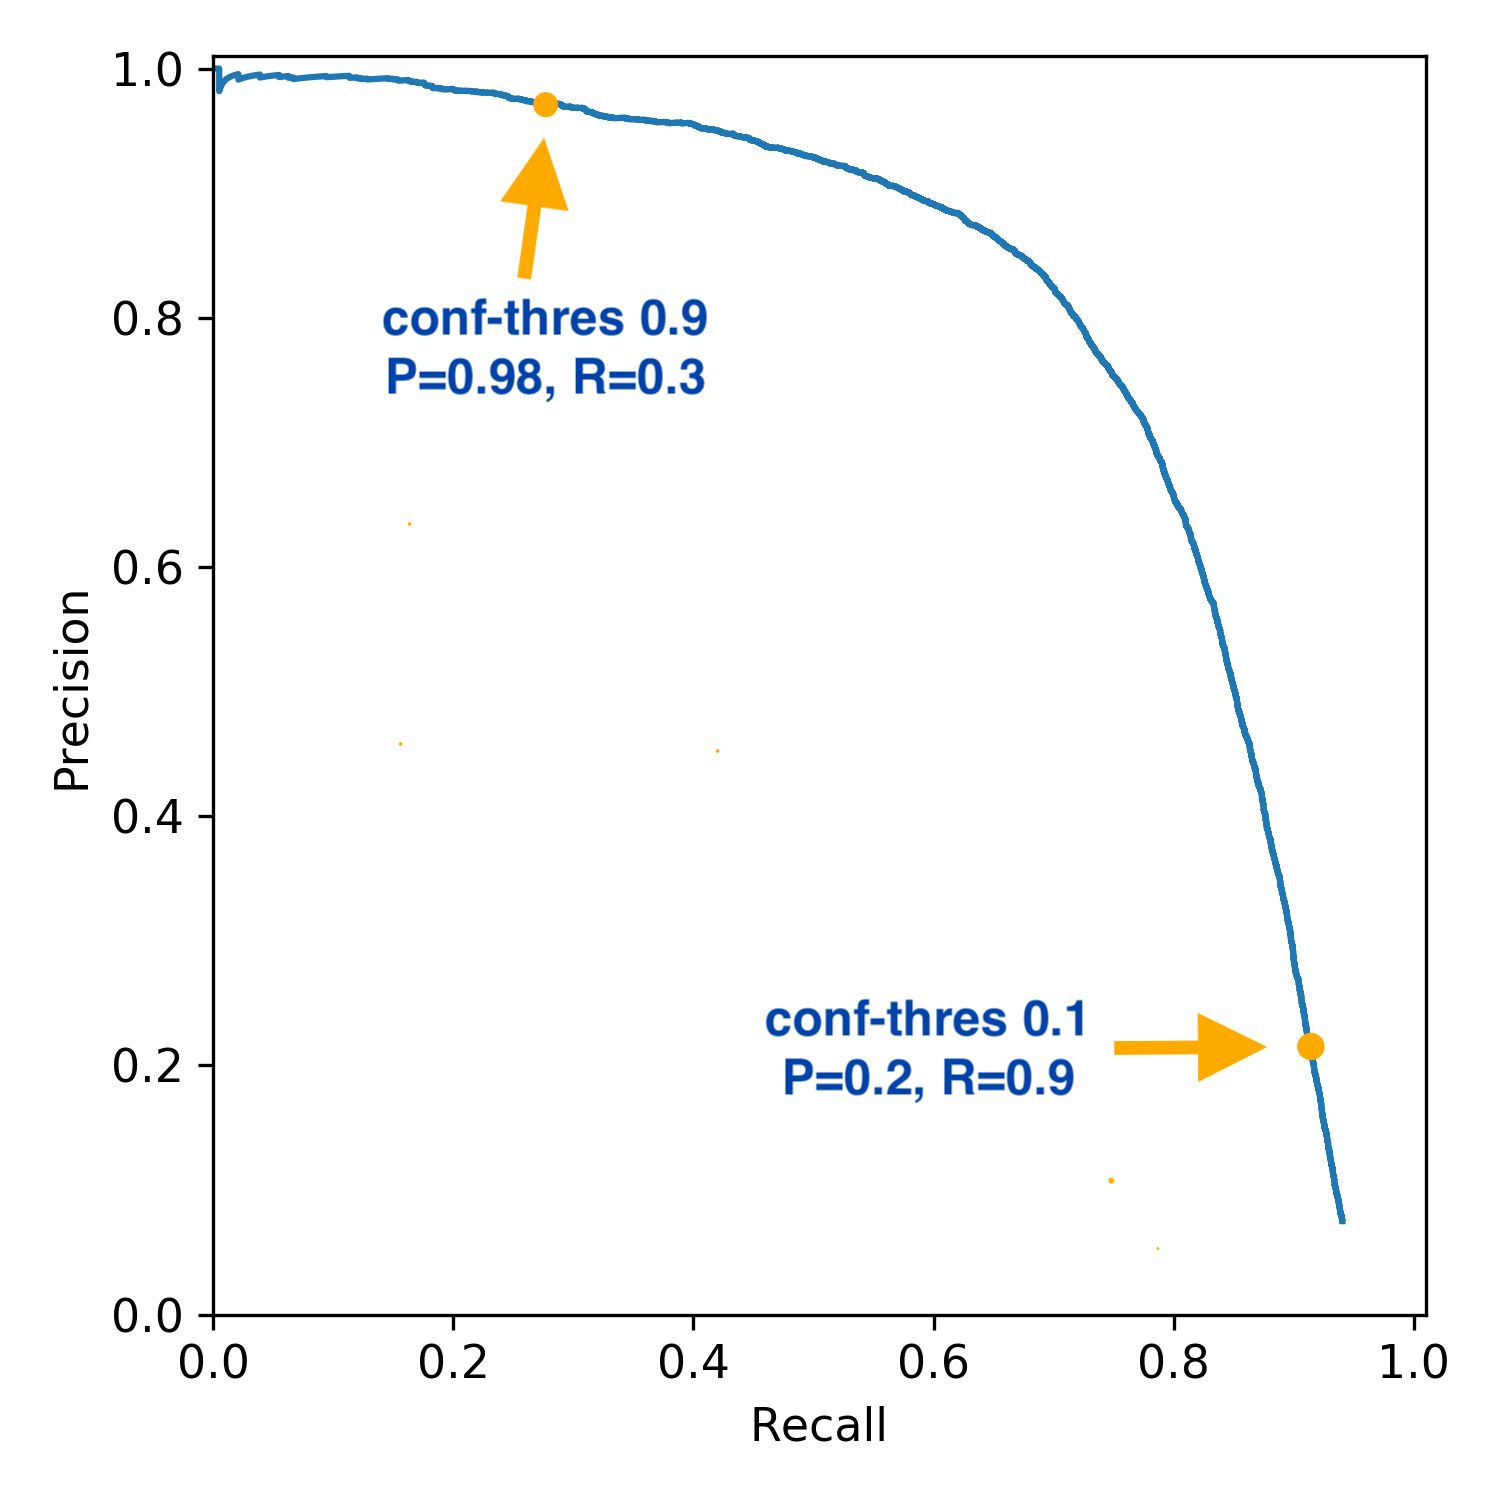

(source: https://user-images.githubusercontent.com/26833433/76019078-0a79fb00-5ed6-11ea-8b5b-5697bbbd7e7e.png)

# Hyperparameter Tuning with Validation Set

Many machine learning algorithms have one or more *hyperparameters*, e.g. the Learning Rate $\alpha$ in Gradient Descent or the Regularization Parameter $\lambda$ in Polynomial Regression. These hyperparameters have a big influence on the quality of the resulting model. For this reason, we need to choose them properly. 

In order to find the proper values for the hyperparameters, we can train separate models for each parameter settings, e.g. a model for $\alpha = 1, \alpha = 0.1$ and $\alpha = 0.03$. But how can we evaluate the quality of these three models? We cannot use the test data, since this data should remain "unseen", i.e. no knowledge about the test data should be used while building the model. For this reason, we often split the whole dataset into three subsets: Training Set, **Validation Set** and Test Set (e.g. with 70%, 20%, and 10% of the data, respectively). Then we can use the validation set to evaluate the quality of the models for different values of the hyperparameters (so-called "Hyperparameter Tuning"), and once we have found the "best" of these models, we can evaluate its performance on the test set. Note that the validation set is also called *Development Set* sometimes since it is used during the development of the model.



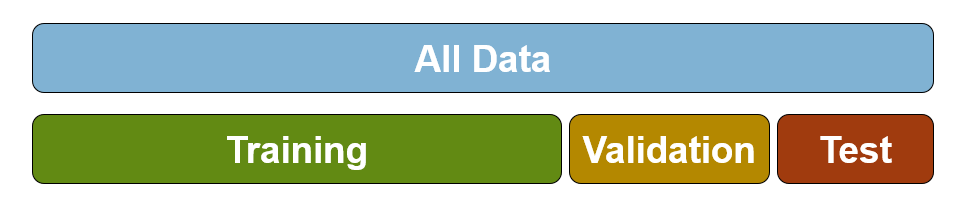

To create training, validation and test set, we can apply train_test_split of sklearn twice, as shown in following code. 


In [7]:
import numpy as np
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(n_samples=1000, random_state=0)

# split into train, validation and test sets in two steps:
# 1. Split data test set and train_all set that will subsequently split into training and validation datasets
X_all, X_test, y_all, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# 2. Split train_all in training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.222, random_state=0)


print(f"Dataset shape before splitting: X: {X.shape}; y: {y.shape}")
print(f"Dataset shape after splitting: X: train: {X_train.shape}, validation: {X_val.shape}, test: {X_test.shape}; y: train: {y_train.shape}, validation: {y_val.shape}, test: {y_test.shape}")

Dataset shape before splitting: X: (1000, 2); y: (1000,)
Dataset shape after splitting: X: train: (700, 2), validation: (200, 2), test: (100, 2); y: train: (700,), validation: (200,), test: (100,)


 Note that  sklearn's `train_test_split()` also offeres options for stratified sampling, random shuffling etc. 

# Cross Validation

A major disadvantage of splitting the data into training, validation and test set is that we are "loosing" much of the data for training, since it is held out in the validation and test set. In addition, if we only have few data samples available in total (say 100 samples), then the test set will be very small, e.g. 10 samples with a 70:20:10-split. This will yield rather unreliable test results.  

To circumvene these disadvantages, we can use **Cross Validation**, which is explained in the following video.

# TASK: Watch the following video: https://www.youtube.com/watch?v=hoNpvry0370 




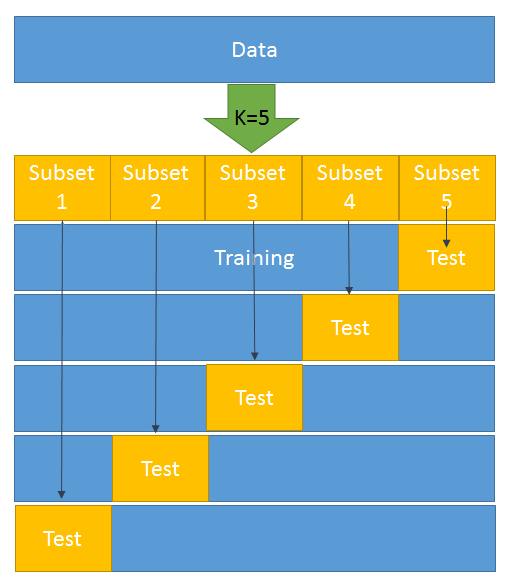

(source: https://static.packt-cdn.com/products/9781788830577/graphics/1486826c-3589-46a5-83b8-a4a7a596b6d3.png)


Ressources: 
- Tutorial Cross Validation: https://www.youtube.com/watch?v=TIgfjmp-4BA


#Next Step: Please answer the quizzes on Moodle now